In [61]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette("bright")
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [62]:
file = '../data/alkon-hinnasto-tekstitiedostona.csv'
df = pd.read_csv(file)
df = df[df['Tyyppi'] == 'oluet']
display(df.shape)

(1156, 30)

In [63]:
df.head()

,Numero,Nimi,Valmistaja,Pullokoko,Hinta,Litrahinta,Uutuus,Hinnastojärjestyskoodi,Tyyppi,Alatyyppi,...,Suljentatyyppi,Alkoholi-%,Hapot g/l,Sokeri g/l,Kantavierrep-%,Väri EBC,Katkerot EBU,Energia kcal/100 ml,Valikoima,EAN
6264,718897,Maxwell Honey Mead,Maxwell Wines,"0,75 l",18.04,23.92,NaN,600,oluet,Erikoisuus,...,metallinen kierrekapseli,12.5,NaN,NaN,26.6,NaN,NaN,100.0,vakiovalikoima,9317705000107
6265,715894,Achel Blond,De Achelse Kluis,"0,33 l",5.01,15.18,NaN,600,oluet,Erikoisuus,...,kruunukorkki,8.0,NaN,NaN,17.8,15.9,23.0,70.0,vakiovalikoima,5425007658828
6266,758594,Achel Bruin,De Achelse Kluis,"0,33 l",5.34,16.18,NaN,600,oluet,Erikoisuus,...,kruunukorkki,8.0,NaN,NaN,18.5,41.8,24.0,70.0,vakiovalikoima,5425007658880
6267,730097,Achel Extra Bruin,De Achelse Kluis,"0,75 l",15.51,20.68,NaN,600,oluet,Erikoisuus,...,kruunukorkki,9.5,NaN,NaN,19.4,70.5,18.0,70.0,vakiovalikoima,5425007658859
6268,919855,Alvinne Phi Blond Sour Ale,Brouwerij Alvinne NV,"0,33 l",5.42,16.42,NaN,600,oluet,Erikoisuus,...,kruunukorkki,8.0,NaN,NaN,17.6,NaN,7.0,70.0,tilausvalikoima,5425031890355


<AxesSubplot:xlabel='Alkoholi-%', ylabel='Count'>

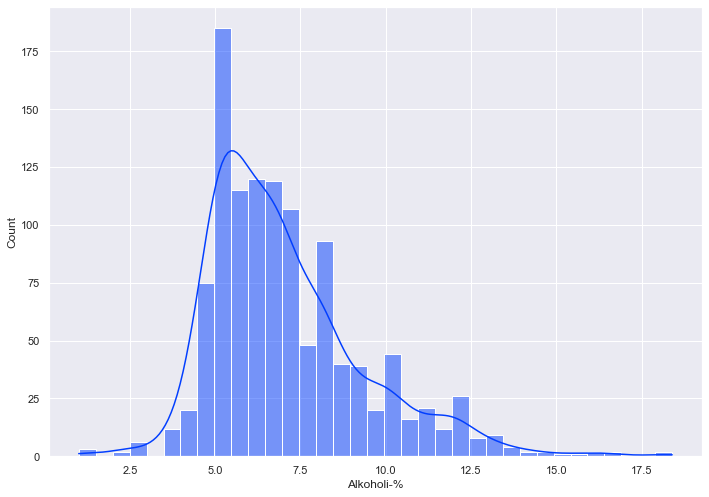

In [64]:
sns.histplot(data=df, x="Alkoholi-%", kde=True)

<AxesSubplot:xlabel='Alatyyppi', ylabel='Alkoholi-%'>

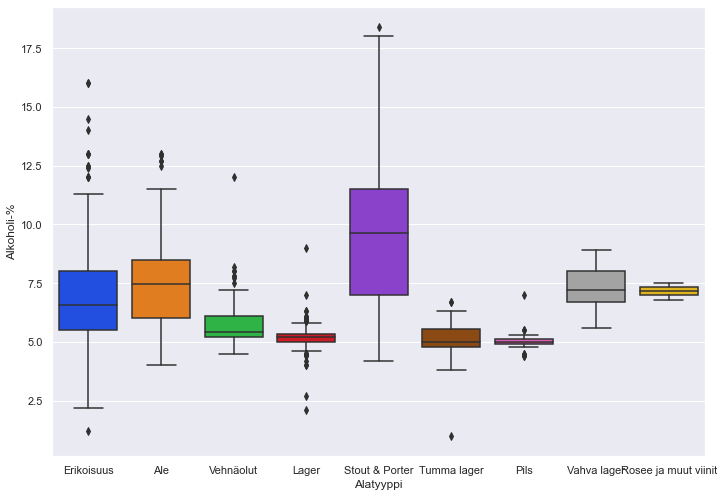

In [65]:
sns.boxplot(x="Alatyyppi", y="Alkoholi-%", data=df)

In [66]:
kmeans = KMeans(random_state=0).fit(df[['Alkoholi-%']])
df['Cluster Alcohol Percentage'] = kmeans.labels_

,count_of_products,mean_price,median_price,mean_litre_price,median_litre_price,mean_alcohol_percentage,median_alcohol_percentage
Cluster Alcohol Percentage,,,,,,,
4,351,5.509972,3.990,10.216923,9.560,5.124217,5.20
3,219,7.796667,4.920,14.637443,14.180,6.195890,6.20
7,190,6.723684,5.000,15.480263,14.760,7.080000,7.00
1,148,8.153378,6.470,17.232162,16.315,8.163514,8.00
5,118,8.487034,7.255,21.835847,20.615,9.690678,9.95
2,79,12.558228,9.990,28.890633,27.110,11.903797,12.00
0,37,3.558108,3.460,9.430811,9.580,3.354054,3.80
6,14,17.327143,14.435,43.510000,43.175,15.485714,15.25


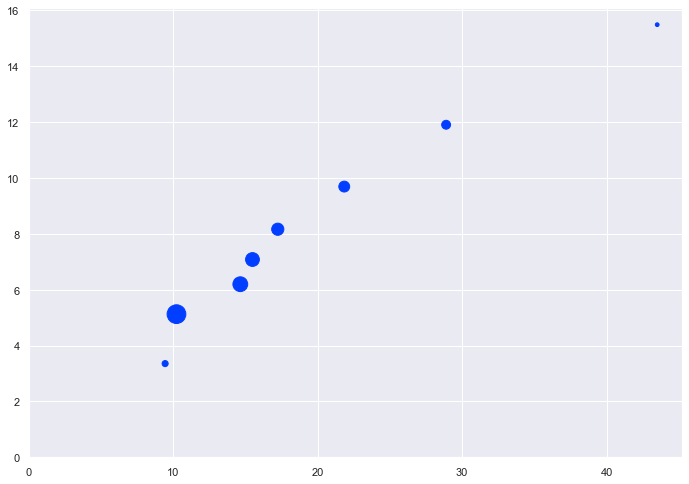

In [72]:
df_cluster = df.groupby(['Cluster Alcohol Percentage']).agg(
    count_of_products = ('Numero', 'count'),
    mean_price = ('Hinta', 'mean'),
    median_price = ('Hinta', 'median'),
    mean_litre_price = ('Litrahinta', 'mean'),
    median_litre_price = ('Litrahinta', 'median'),
    mean_alcohol_percentage = ('Alkoholi-%', 'mean'),
    median_alcohol_percentage = ('Alkoholi-%', 'median')
).sort_values(by='count_of_products',ascending=False)
display(df_cluster.head(10))
plt.scatter(x='mean_litre_price', y='mean_alcohol_percentage', s='count_of_products', data=df_cluster)
plt.xlim(0)
plt.ylim(0)
plt.show()

<AxesSubplot:xlabel='Cluster Alcohol Percentage', ylabel='Alkoholi-%'>

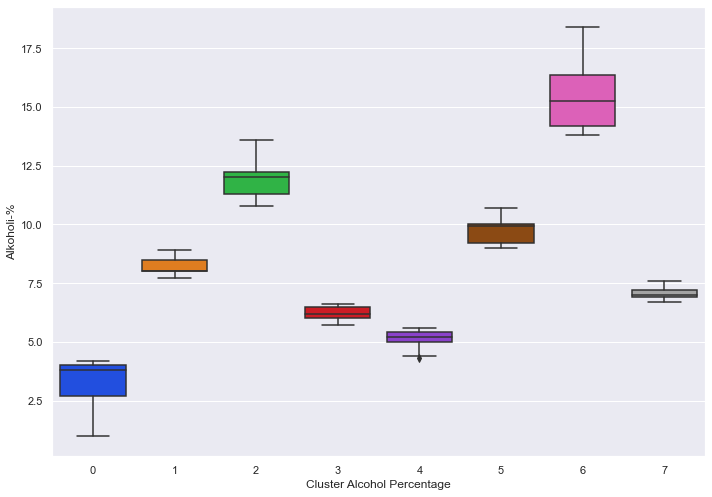

In [73]:
sns.boxplot(x="Cluster Alcohol Percentage", y="Alkoholi-%", data=df)

In [74]:
df.head()

,Numero,Nimi,Valmistaja,Pullokoko,Hinta,Litrahinta,Uutuus,Hinnastojärjestyskoodi,Tyyppi,Alatyyppi,...,Alkoholi-%,Hapot g/l,Sokeri g/l,Kantavierrep-%,Väri EBC,Katkerot EBU,Energia kcal/100 ml,Valikoima,EAN,Cluster Alcohol Percentage
6264,718897,Maxwell Honey Mead,Maxwell Wines,"0,75 l",18.04,23.92,NaN,600,oluet,Erikoisuus,...,12.5,NaN,NaN,26.6,NaN,NaN,100.0,vakiovalikoima,9317705000107,2
6265,715894,Achel Blond,De Achelse Kluis,"0,33 l",5.01,15.18,NaN,600,oluet,Erikoisuus,...,8.0,NaN,NaN,17.8,15.9,23.0,70.0,vakiovalikoima,5425007658828,1
6266,758594,Achel Bruin,De Achelse Kluis,"0,33 l",5.34,16.18,NaN,600,oluet,Erikoisuus,...,8.0,NaN,NaN,18.5,41.8,24.0,70.0,vakiovalikoima,5425007658880,1
6267,730097,Achel Extra Bruin,De Achelse Kluis,"0,75 l",15.51,20.68,NaN,600,oluet,Erikoisuus,...,9.5,NaN,NaN,19.4,70.5,18.0,70.0,vakiovalikoima,5425007658859,5
6268,919855,Alvinne Phi Blond Sour Ale,Brouwerij Alvinne NV,"0,33 l",5.42,16.42,NaN,600,oluet,Erikoisuus,...,8.0,NaN,NaN,17.6,NaN,7.0,70.0,tilausvalikoima,5425031890355,1


<AxesSubplot:xlabel='Alkoholi-%', ylabel='Count'>

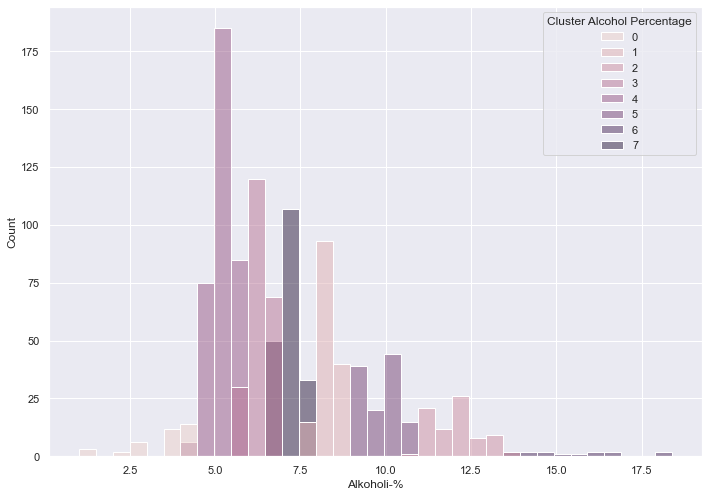

In [75]:
sns.histplot(data=df, x="Alkoholi-%", hue="Cluster Alcohol Percentage")

<AxesSubplot:xlabel='Alkoholi-%', ylabel='Litrahinta'>

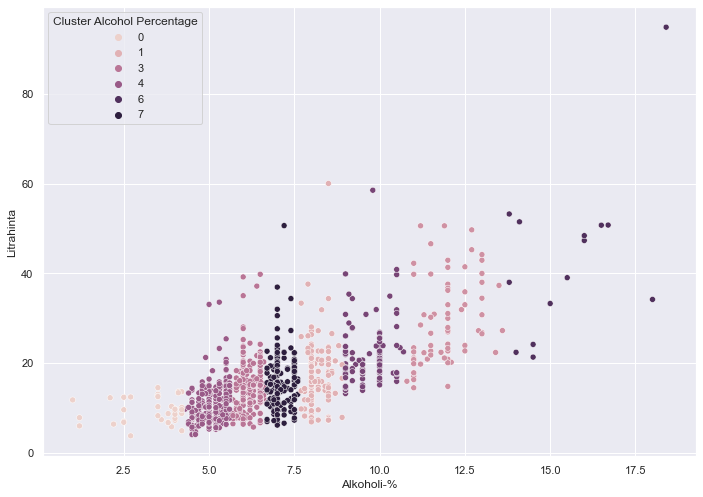

In [79]:
sns.scatterplot(data=df, x='Alkoholi-%', y='Litrahinta', hue="Cluster Alcohol Percentage")

In [80]:
kmeans = KMeans(random_state=0).fit(df[['Litrahinta']])
df['Cluster Litre Price'] = kmeans.labels_

,count_of_products,mean_price,median_price,mean_litre_price,median_litre_price,mean_alcohol_percentage,median_alcohol_percentage
Cluster Litre Price,,,,,,,
3,291,5.695773,4.98,14.751615,14.730,6.768385,6.50
0,251,5.464104,3.69,7.299084,7.520,5.402390,5.20
7,237,6.054641,3.99,11.210042,11.340,5.873418,5.80
1,182,7.887363,6.90,19.263956,19.285,8.094505,8.00
5,125,10.597040,9.46,24.241840,23.730,9.301600,9.20
6,50,15.752200,13.66,35.100200,34.410,10.454000,10.75
2,19,22.996842,18.99,49.088947,49.690,12.584211,12.70
4,1,44.880000,44.88,94.880000,94.880,18.400000,18.40


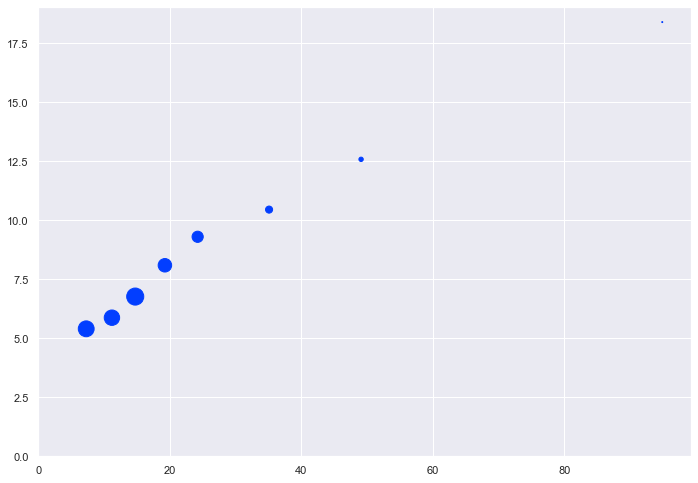

In [81]:
df_cluster = df.groupby(['Cluster Litre Price']).agg(
    count_of_products = ('Numero', 'count'),
    mean_price = ('Hinta', 'mean'),
    median_price = ('Hinta', 'median'),
    mean_litre_price = ('Litrahinta', 'mean'),
    median_litre_price = ('Litrahinta', 'median'),
    mean_alcohol_percentage = ('Alkoholi-%', 'mean'),
    median_alcohol_percentage = ('Alkoholi-%', 'median')
).sort_values(by='count_of_products',ascending=False)
display(df_cluster.head(10))
plt.scatter(x='mean_litre_price', y='mean_alcohol_percentage', s='count_of_products', data=df_cluster)
plt.xlim(0)
plt.ylim(0)
plt.show()

<AxesSubplot:xlabel='Cluster Litre Price', ylabel='Alkoholi-%'>

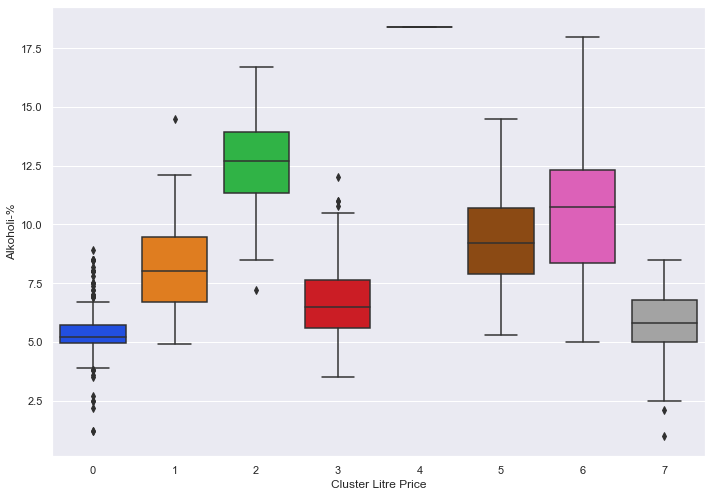

In [82]:
sns.boxplot(x="Cluster Litre Price", y="Alkoholi-%", data=df)

<AxesSubplot:xlabel='Litrahinta', ylabel='Count'>

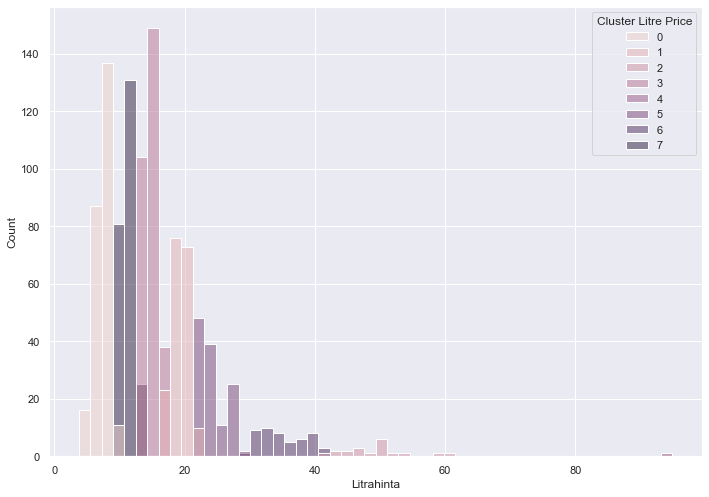

In [83]:
sns.histplot(data=df, x="Litrahinta", hue="Cluster Litre Price")

<AxesSubplot:xlabel='Alkoholi-%', ylabel='Litrahinta'>

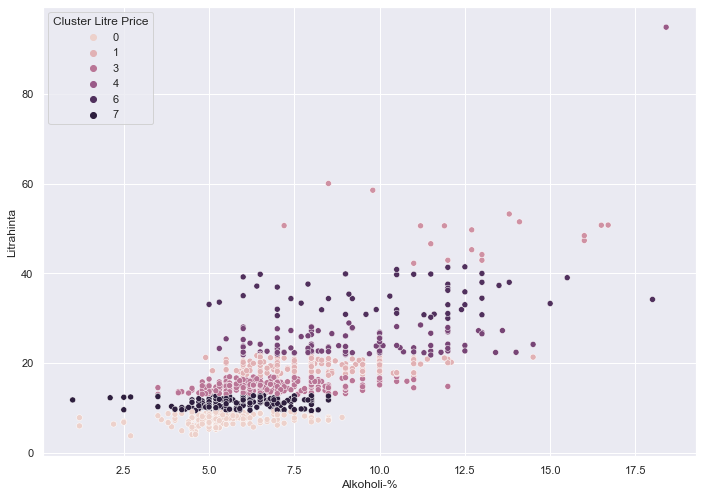

In [84]:
sns.scatterplot(data=df, x='Alkoholi-%', y='Litrahinta', hue="Cluster Litre Price")

In [85]:
kmeans = KMeans(random_state=0).fit(df[['Hinta']])
df['Cluster Price'] = kmeans.labels_

,count_of_products,mean_price,median_price,mean_litre_price,median_litre_price,mean_alcohol_percentage,median_alcohol_percentage
Cluster Price,,,,,,,
0,794,4.428338,4.440,11.911411,11.810,6.230605,6.00
4,261,8.773908,8.530,21.618391,21.590,8.656705,8.20
2,66,15.723333,15.560,29.219394,27.205,9.098485,8.40
6,22,24.780455,24.905,30.856364,33.210,9.627273,9.85
3,9,41.755556,44.880,37.596667,46.590,10.000000,8.50
1,2,225.810000,225.810,8.495000,8.495,5.550000,5.55
5,1,84.100000,84.100,28.030000,28.030,8.000000,8.00
7,1,192.950000,192.950,9.650000,9.650,5.800000,5.80


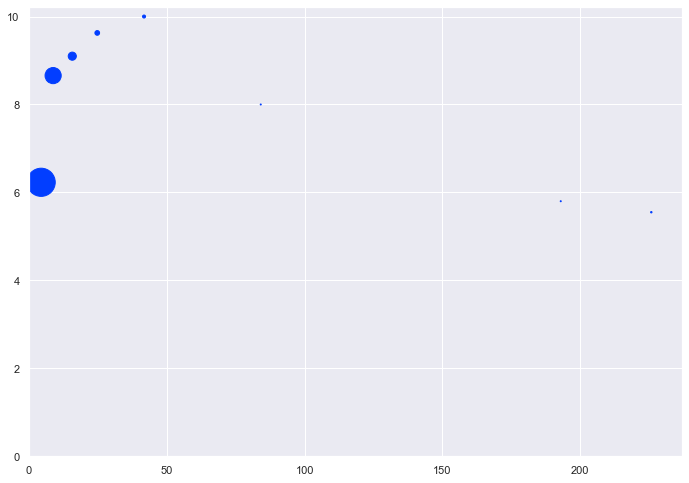

In [87]:
df_cluster = df.groupby(['Cluster Price']).agg(
    count_of_products = ('Numero', 'count'),
    mean_price = ('Hinta', 'mean'),
    median_price = ('Hinta', 'median'),
    mean_litre_price = ('Litrahinta', 'mean'),
    median_litre_price = ('Litrahinta', 'median'),
    mean_alcohol_percentage = ('Alkoholi-%', 'mean'),
    median_alcohol_percentage = ('Alkoholi-%', 'median')
).sort_values(by='count_of_products',ascending=False)
display(df_cluster.head(10))
plt.scatter(x='mean_price', y='mean_alcohol_percentage', s='count_of_products', data=df_cluster)
plt.xlim(0)
plt.ylim(0)
plt.show()

<AxesSubplot:xlabel='Cluster Price', ylabel='Alkoholi-%'>

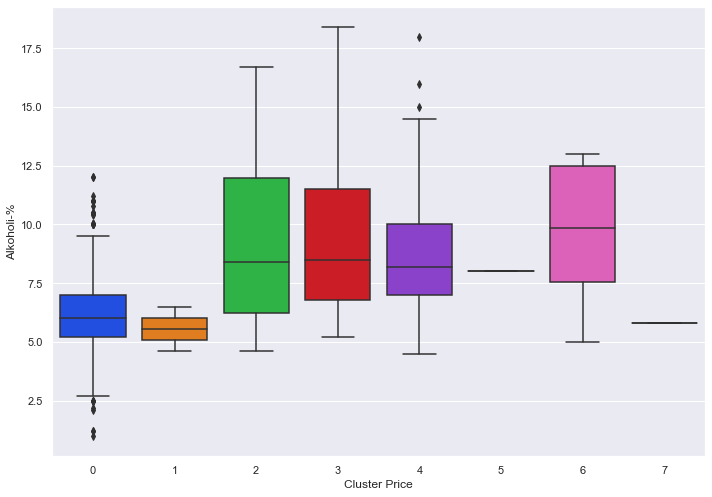

In [88]:
sns.boxplot(x="Cluster Price", y="Alkoholi-%", data=df)

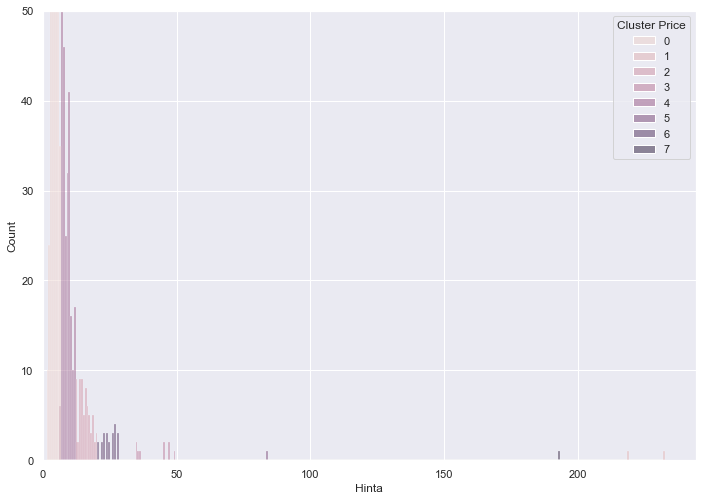

In [90]:
sns.histplot(data=df, x="Hinta", hue="Cluster Price")
plt.xlim(0)
plt.ylim(0, 50)
plt.show()

<AxesSubplot:xlabel='Alkoholi-%', ylabel='Litrahinta'>

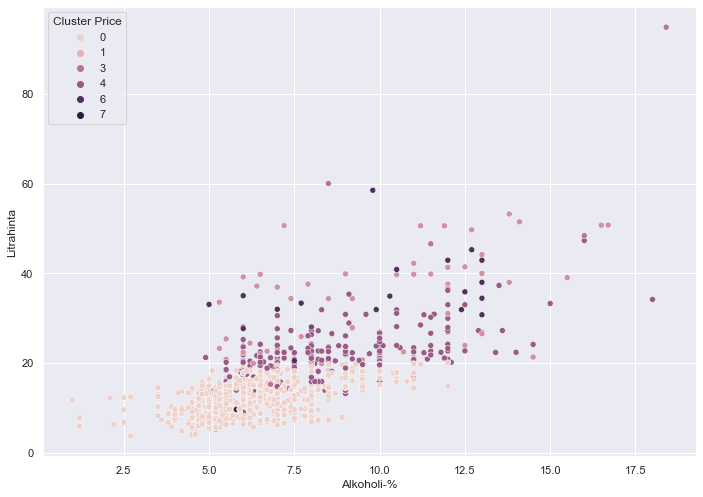

In [91]:
sns.scatterplot(data=df, x='Alkoholi-%', y='Litrahinta', hue="Cluster Price")

<AxesSubplot:xlabel='Alkoholi-%', ylabel='Hinta'>

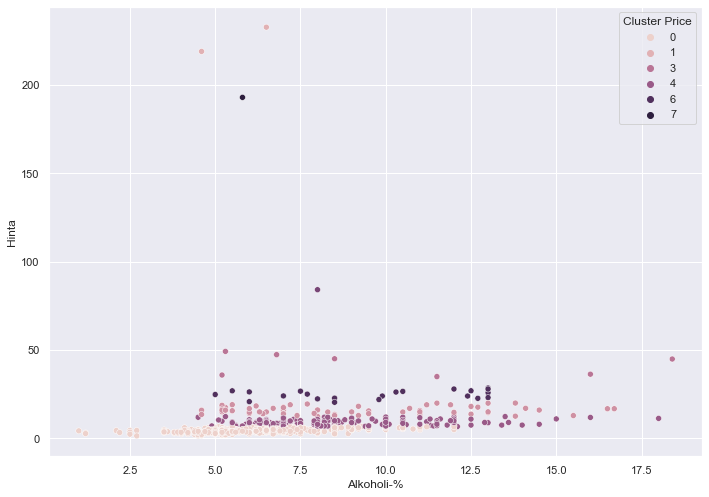

In [92]:
sns.scatterplot(data=df, x='Alkoholi-%', y='Hinta', hue="Cluster Price")

[None]

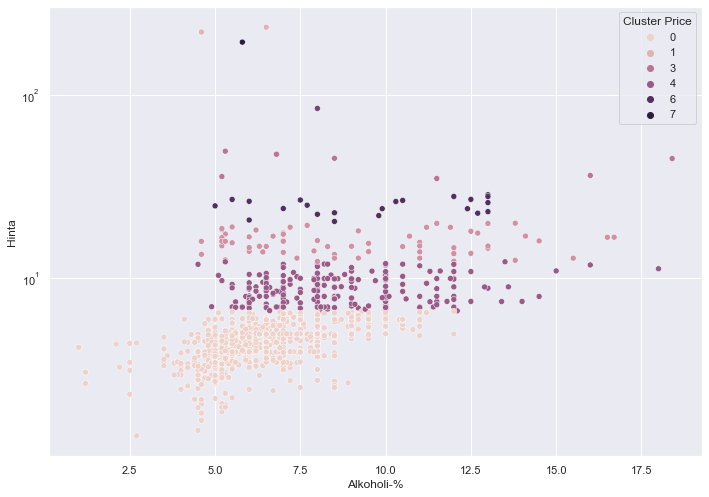

In [94]:
splot = sns.scatterplot(data=df, x='Alkoholi-%', y='Hinta', hue="Cluster Price")
splot.set(yscale="log")

In [95]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [102]:
kmeans = KMeans(random_state=0).fit(df[['Hinta', 'Litrahinta', 'Alkoholi-%']])
df['Cluster Price, Litre Price, Alcohol Percentage'] = kmeans.labels_

,count_of_products,mean_price,median_price,mean_litre_price,median_litre_price,mean_alcohol_percentage,median_alcohol_percentage
"Cluster Price, Litre Price, Alcohol Percentage",,,,,,,
5,465,5.229677,4.970,14.340903,14.30,6.670968,6.5
0,342,3.651082,3.680,8.313977,8.20,5.426023,5.2
2,251,9.022550,8.490,21.805179,21.41,8.833068,8.5
4,55,15.605818,13.850,34.471818,34.37,10.265455,10.5
3,20,25.418000,22.290,51.000500,50.14,12.850000,12.7
7,16,19.318125,17.530,6.780625,5.80,5.843750,5.2
6,4,57.000000,48.275,16.082500,15.27,6.725000,6.8
1,3,214.856667,218.950,8.880000,9.65,5.633333,5.8


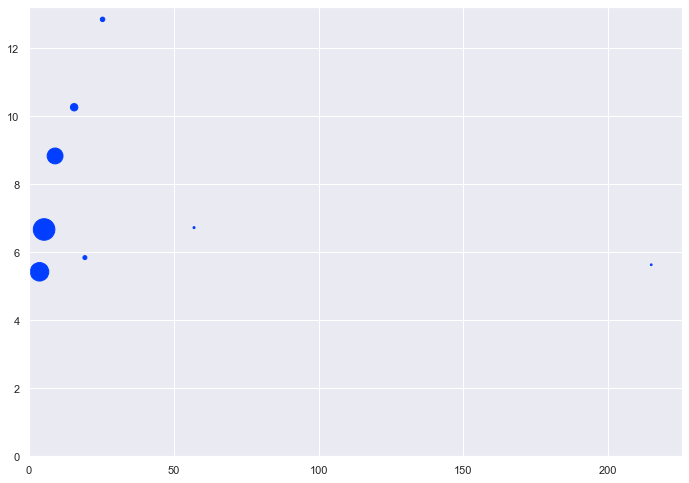

In [103]:
df_cluster = df.groupby(['Cluster Price, Litre Price, Alcohol Percentage']).agg(
    count_of_products = ('Numero', 'count'),
    mean_price = ('Hinta', 'mean'),
    median_price = ('Hinta', 'median'),
    mean_litre_price = ('Litrahinta', 'mean'),
    median_litre_price = ('Litrahinta', 'median'),
    mean_alcohol_percentage = ('Alkoholi-%', 'mean'),
    median_alcohol_percentage = ('Alkoholi-%', 'median')
).sort_values(by='count_of_products',ascending=False)
display(df_cluster.head(10))
plt.scatter(x='mean_price', y='mean_alcohol_percentage', s='count_of_products', data=df_cluster)
plt.xlim(0)
plt.ylim(0)
plt.show()

In [105]:
df.head()

,Numero,Nimi,Valmistaja,Pullokoko,Hinta,Litrahinta,Uutuus,Hinnastojärjestyskoodi,Tyyppi,Alatyyppi,...,Kantavierrep-%,Väri EBC,Katkerot EBU,Energia kcal/100 ml,Valikoima,EAN,Cluster Alcohol Percentage,Cluster Litre Price,Cluster Price,"Cluster Price, Litre Price, Alcohol Percentage"
6264,718897,Maxwell Honey Mead,Maxwell Wines,"0,75 l",18.04,23.92,NaN,600,oluet,Erikoisuus,...,26.6,NaN,NaN,100.0,vakiovalikoima,9317705000107,2,5,2,2
6265,715894,Achel Blond,De Achelse Kluis,"0,33 l",5.01,15.18,NaN,600,oluet,Erikoisuus,...,17.8,15.9,23.0,70.0,vakiovalikoima,5425007658828,1,3,0,5
6266,758594,Achel Bruin,De Achelse Kluis,"0,33 l",5.34,16.18,NaN,600,oluet,Erikoisuus,...,18.5,41.8,24.0,70.0,vakiovalikoima,5425007658880,1,3,0,5
6267,730097,Achel Extra Bruin,De Achelse Kluis,"0,75 l",15.51,20.68,NaN,600,oluet,Erikoisuus,...,19.4,70.5,18.0,70.0,vakiovalikoima,5425007658859,5,1,2,2
6268,919855,Alvinne Phi Blond Sour Ale,Brouwerij Alvinne NV,"0,33 l",5.42,16.42,NaN,600,oluet,Erikoisuus,...,17.6,NaN,7.0,70.0,tilausvalikoima,5425031890355,1,3,0,5


<AxesSubplot:xlabel='Alkoholi-%', ylabel='Litrahinta'>

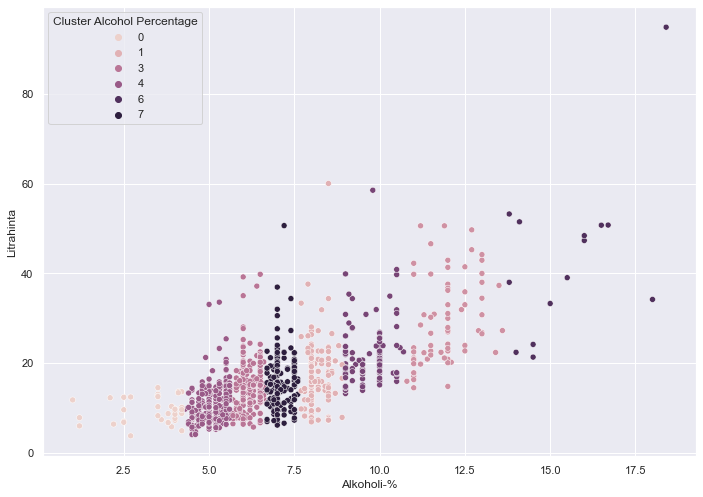

In [107]:
sns.scatterplot(data=df, x='Alkoholi-%', y='Litrahinta', hue="Cluster Alcohol Percentage")

<AxesSubplot:xlabel='Alkoholi-%', ylabel='Litrahinta'>

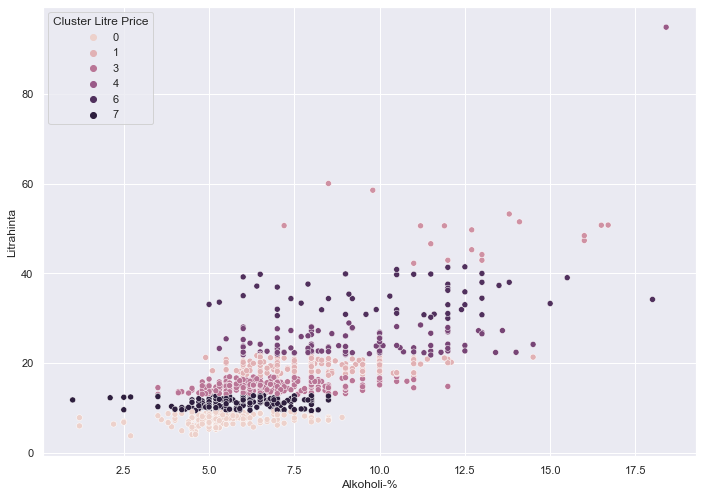

In [108]:
sns.scatterplot(data=df, x='Alkoholi-%', y='Litrahinta', hue="Cluster Litre Price")

<AxesSubplot:xlabel='Alkoholi-%', ylabel='Litrahinta'>

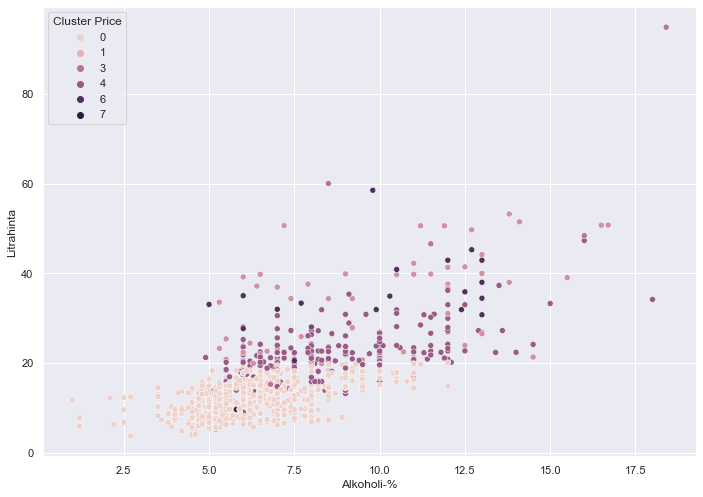

In [109]:
sns.scatterplot(data=df, x='Alkoholi-%', y='Litrahinta', hue="Cluster Price")

<AxesSubplot:xlabel='Alkoholi-%', ylabel='Litrahinta'>

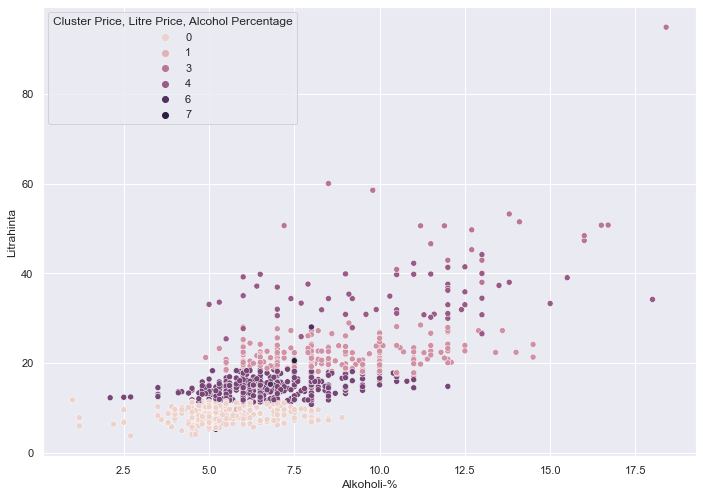

In [110]:
sns.scatterplot(data=df, x='Alkoholi-%', y='Litrahinta', hue="Cluster Price, Litre Price, Alcohol Percentage")